<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3
#### Milena Waichman Scigliano


# Introduccion


En este informe se trabajará con estimación espectral, una técnica que permite analizar cómo se distribuye la potencia de una señal a lo largo de las frecuencias. Para ello, se utilizará la Transformada Rápida de Fourier (FFT), que permite calcular la densidad espectral de potencia (PSD), proporcionando una representación de la potencia de la señal distribuida sobre las distintas frecuencias.

Un fenómeno importante al trabajar con la FFT es el desparramo espectral (spectral leakage), que ocurre cuando la frecuencia de la señal no coincide exactamente con un bin de frecuencia de la FFT. Esto provoca que la energía de la señal se distribuya entre varios bins, en lugar de concentrarse en uno solo. Para mitigar este efecto, se pueden aplicar técnicas como el zero padding, que mejoran la resolución espectral y permiten visualizar más claramente los componentes de frecuencia de la señal.

En este trabajo utilizaremos el gráfico de los espectros en dB, lo que transforma la magnitud lineal en una escala logarítmica. Esto comprime la información, permitiendo visualizar picos grandes y detalles pequeños al mismo tiempo. Los decibeles son especialmente útiles cuando se analiza la respuesta en frecuencia o la densidad espectral de potencia, porque nos interesa comparar la relación de amplitudes entre distintas frecuencias, no el valor absoluto. De esta manera, incluso señales con diferencias de potencia muy grandes se pueden representar en la misma gráfica de forma clara.

En este informe se estudiarán señales senoidales con pequeñas desintonías respecto a la resolución de la FFT, se evaluará su potencia mediante el Teorema de Parseval, se aplicará zero padding para observar su efecto en la resolución espectral, y se analizará la respuesta en frecuencia de sistemas lineales e invariantes en el tiempo (LTI) vistos en la TS2.

# 1) Densidad Espectral de Potencia

A partir de una función senoidal se generaron tres señales con frecuencias distintas:
$$fs_1=N/4\cdot \Delta F$$  $$fs_2=(N/4+0,25) \cdot \Delta F$$  $$fs_3=(N/4+0,5) \cdot \Delta F$$ 
Estas señales fueron normalizadas utilizando su media y desvío estándar.
Posteriormente, se aplicó la Transformada Rápida de Fourier (FFT) para pasar al dominio de las frecuencias y poder calcular su densidad espectral de potencia (PSD). La FFT está definida como:
$$ X[k]=\sum_{n=0}^{N-1} x[n]e^{-j2\pi kn/N}$$
Como se explicó en la introducción, la PSD describe cómo se distribuye la potencia de la señal sobre las distintas frecuencias. Para su estimación se utilizó el periodograma, que consiste en analizar la energía de la señal en cada bin de la FFT (cada “cajoncito” de frecuencia). El cálculo se realiza de la siguiente forma:
$$PSD(f_k)=\frac {1}{N}|X[k]|^2$$
Además, al trabajar con el semiespectro positivo (frecuencias mayores o iguales a cero), se multiplicó la amplitud por 2 para compensar la energía que se encuentra en las frecuencias negativas del espectro. De este modo, el cálculo de la potencia total se mantiene consistente con el espectro completo.

De esta manera, el periodograma obtenido permite visualizar la distribución espectral de cada señal y observar fenómenos como el desparramo espectral cuando la frecuencia no coincide exactamente con un bin de la FFT.

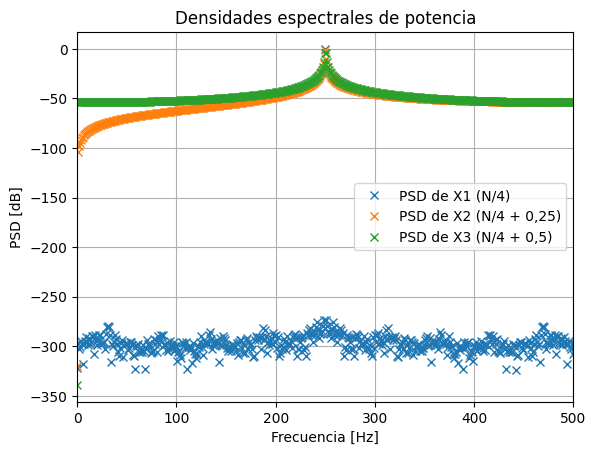

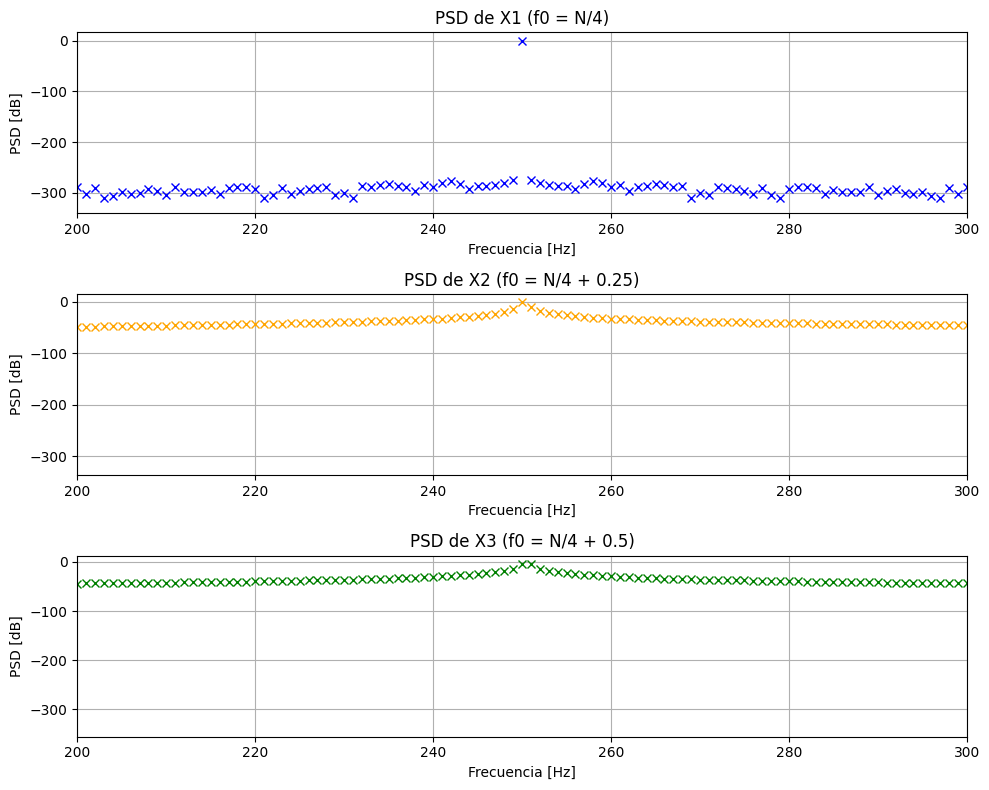

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy import signal

def mi_funcion_sen (A0, offset, f0, phase, nn, fs):
    tiempo = np.arange(0, N * Ts, Ts)
    x = A0 * np.sin(2 * np.pi * f0 * tiempo)
    x = x - x.mean()
    x = x / np.sqrt(np.var(x))
    var_x = np.var(x)
    return tiempo, x, var_x

N = 1000
fs = N   ##esto quiere decir que yo voy a tomar 1000 muestras por segundo. 
deltaF = fs / N
Ts = 1 / fs
freqs = np.arange(N) * deltaF

tiempo1, x1, var_x1 = mi_funcion_sen(A0 = 1, offset = 0, f0 = N/4 * deltaF , phase = 0, nn = N, fs = fs/2)
tiempo2, x2, var_x2 = mi_funcion_sen(A0 = 1, offset = 0, f0 = ((N/4) + 0.25) * deltaF, phase = 0, nn = N, fs = fs)
tiempo3, x3, var_x3 = mi_funcion_sen(A0 = 1, offset = 0, f0 = ((N/4) + 0.5) * deltaF , phase = 0, nn = N, fs = fs)


X1 = fft(x1)
X1abs = 1/N * np.abs(X1)


X2 = fft(x2)
X2abs = 1/N * np.abs(X2)


X3 = fft(x3)
X3abs = 1/N * np.abs(X3)



# Graficar solo hasta N/2
plt.figure()
#plt.stem(freqs, X1abs, 'x', label = 'X1 abs')
plt.plot(freqs, 10 * np.log10(2 * X1abs ** 2), 'x', label = 'PSD de X1 (N/4)')
#plt.stem(freqs, X2abs, 'o', label ='X2 abs')
plt.plot(freqs, 10 * np.log10(2 * X2abs ** 2), 'x', label = 'PSD de X2 (N/4 + 0,25)')
#plt.stem(freqs, X3abs, 'x', label = 'X3 abs')
plt.plot(freqs, 10 * np.log10(2 * X3abs ** 2), 'x', label = 'PSD de X3 (N/4 + 0,5)')
plt.legend()

plt.title("Densidades espectrales de potencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB]")
plt.grid(True)
plt.xlim([0, fs/2])
plt.show()

# Grafico PSDs en subplots para visualizar mejor los picos
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs, 10 * np.log10(2 * X1abs ** 2),"x", color='blue')
plt.title('PSD de X1 (f0 = N/4)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.xlim([200, 300])

plt.subplot(3, 1, 2)
plt.plot(freqs, 10 * np.log10(2 * X2abs ** 2), "x", color='orange')
plt.title('PSD de X2 (f0 = N/4 + 0.25)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.xlim([200, 300])

plt.subplot(3, 1, 3)
plt.plot(freqs, 10 * np.log10(2 * X3abs ** 2), "x", color='green')
plt.title('PSD de X3 (f0 = N/4 + 0.5)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.xlim([200, 300])

plt.tight_layout()
plt.show()

A continuacion analizaremos el periodograma de a una señal por vez:

**Señal $fs_1=N/4\cdot \Delta F$**


En este caso la frecuencia coincide exactamente con un bin de la FFT. El periodograma muestra un único pico bien definido en la frecuencia correspondiente y sin energía apreciable en los demás bins. Esto significa que la potencia de la señal está concentrada en un solo “cajoncito” de frecuencia, sin fuga espectral. Este representa el caso ideal.

**Señal $fs_2=(N/4+0,25) \cdot \Delta F$**


Aquí la frecuencia está desintonizada respecto al bin de la FFT. En el periodograma se observa que la energía comienza a distribuirse en bins vecinos, fenómeno conocido como desparramo espectral (leakage). El pico principal ya no es tan concentrado, sino que aparecen lóbulos laterales alrededor.

**Señal $fs_3=(N/4+0,5) \cdot \Delta F$**
   
En este caso la desintonía es aún mayor, ubicándose a mitad de camino entre dos bins. El periodograma muestra que la energía de la señal se reparte casi por igual entre dos bins contiguos. Este es el caso donde el leakage es máximo, ya que la potencia no queda asociada a un único bin sino dividida entre varios.

**Conclusión:**


La FFT “espera” que las frecuencias de la señal coincidan con sus bins de frecuencia. Si esto ocurre, el espectro se muestra con un pico limpio y concentrado. En cambio, cuando la frecuencia no coincide perfectamente con un bin, la FFT la representa como una combinación de varios bins vecinos, lo que genera la aparición de energía derramada (leakage) y lóbulos laterales en el periodograma.



## 2) Identidad de Parseval

En este punto se pide verificar que efectivamente la potencia de las señales este normalizada, es decir sea igual a uno. La potencia normalizada en el dominio del tiempo se escribe como:
$$P_T=\frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2$$
Mientras que esta misma potencia en el dominio de las frecuencias se representa como:
$$P_F=\frac{1}{N^2} \sum_{k=0}^{N-1} |X[k]|^2$$
La unidad de potencia significa que la señal fue normalizada: no importa el valor de la amplitud del seno inicial, al hacer la normalización (restando la media y dividiendo por la desviación estándar) se asegura que la varianza sea igual a uno.

La identidad de Parseval me permite verificar que la energía (o potencia) de una señal en el tiempo es igual a la energía (o potencia) de esa misma señal en frecuencia.
$$\frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2=\frac{1}{N^2} \sum_{k=0}^{N-1} |X[k]|^2$$
Esto permite validar que el periodograma representa correctamente la potencia unitaria de las señales generadas.

In [3]:
potT_x1 = 1/N * np.sum(np.abs(x1) ** 2)
potT_x2 = 1/N * np.sum(np.abs(x2) ** 2)
potT_x3 = 1/N * np.sum(np.abs(x3) ** 2)
potF_X1 = 1/N ** 2 * np.sum(np.abs(X1) ** 2)
potF_X2 = 1/N ** 2 * np.sum(np.abs(X2) ** 2)
potF_X3 = 1/N ** 2 * np.sum(np.abs(X3) ** 2)

def Parseval(potT_x, PotF_X, tol=1e-10):
    if np.isclose(potT_x, PotF_X, rtol = 1e-10, atol = 1e-12):
        print("Se cumple Parseval")
    else:
        print("No se cumple Parseval")


print("Para X1: ")        
ParsevalX1 = Parseval(potT_x1, potF_X1)
print("Para X2: ")        
ParsevalX2 = Parseval(potT_x2, potF_X2)
print("Para X3: ")        
ParsevalX3 = Parseval(potT_x3, potF_X3)


Para X1: 
Se cumple Parseval
Para X2: 
Se cumple Parseval
Para X3: 
Se cumple Parseval


### 3) Zero Padding

El zero padding consiste en agregar ceros al final de una señal antes de calcular su FFT. Esto no altera la señal original, ni su energía ni su potencia, sino que modifica la resolución en frecuencia del espectro obtenido. En otras palabras, se “interpola” el espectro, generando una malla de frecuencias más densa.

Si la señal presenta desparramo espectral, el zero padding permite observar con mayor claridad la forma del pico y estimar con más precisión la frecuencia dominante, aunque la frecuencia real de la señal no cambie.

En este trabajo se representó la densidad espectral de potencia (PSD) tanto en decibelios (dB) como en escala lineal.

- La escala en dB resalta las diferencias relativas entre picos y el nivel del ruido de fondo.
- La escala lineal, en cambio, preserva las unidades físicas de la PSD (potencia por Hz), permitiendo una interpretación cuantitativa de la energía distribuida en frecuencia.

De esta manera, ambas representaciones complementan la interpretación del fenómeno, mostrando cómo el zero padding mejora la resolución visual del espectro sin modificar las propiedades energéticas de la señal

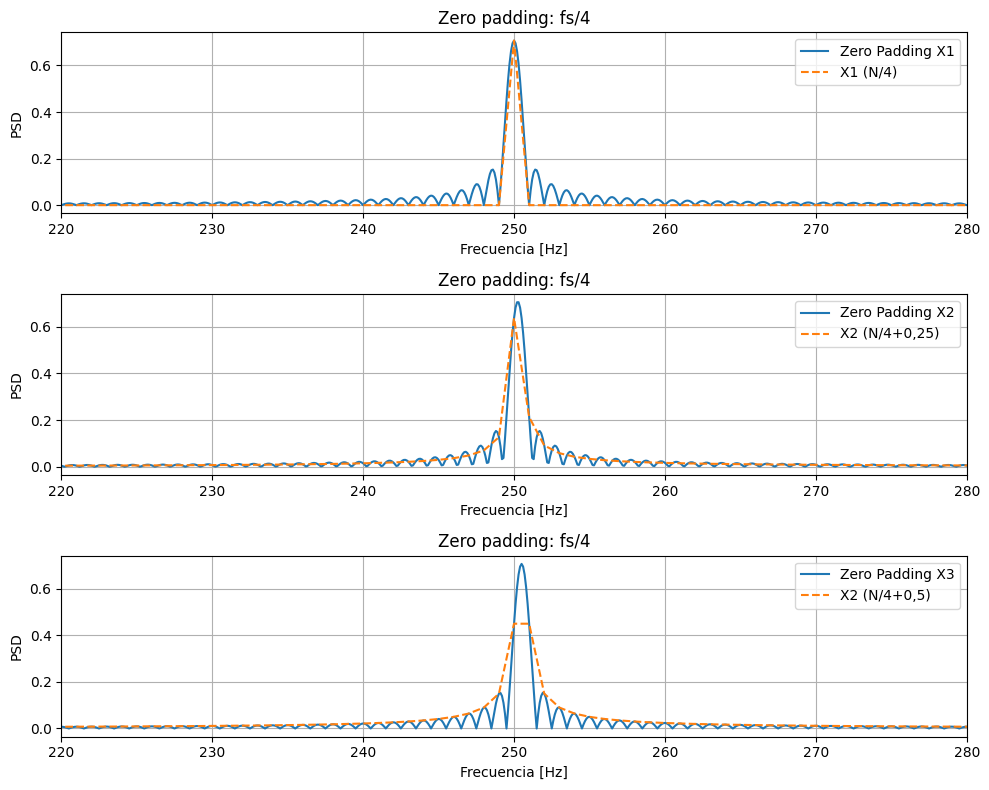

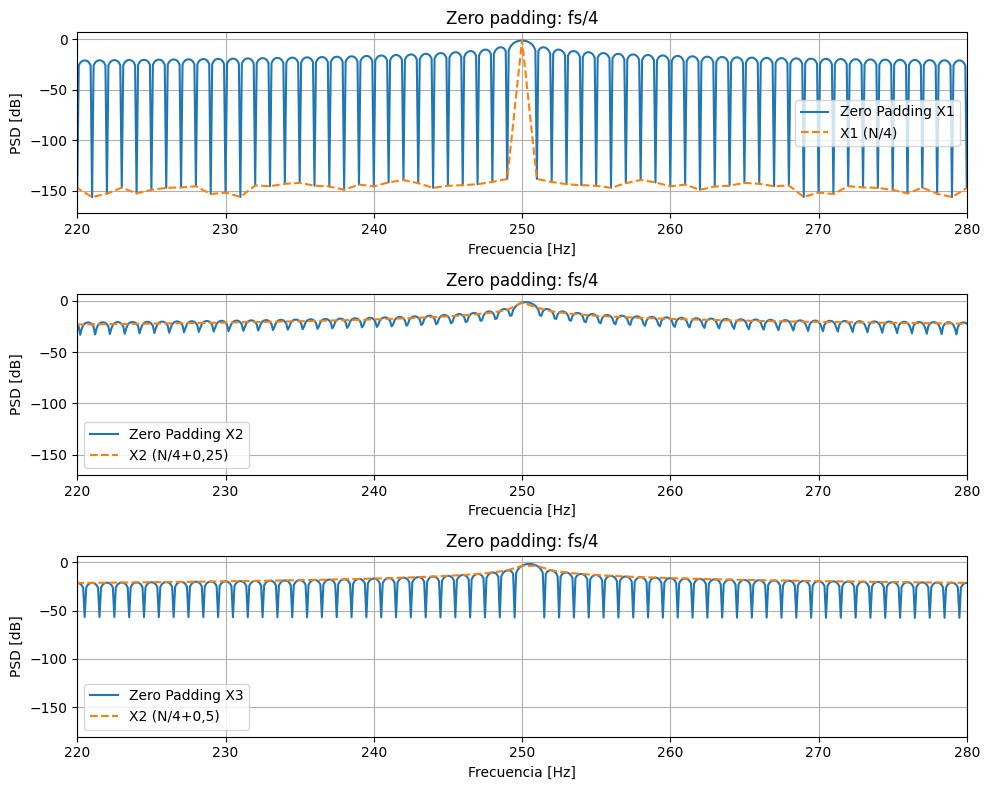

In [2]:
zeroPadding_x1 = np.zeros(10 * N)
zeroPadding_x2 = np.zeros(10 * N)
zeroPadding_x3 = np.zeros(10 * N)

zeroPadding_x1[0:N] = x1 
zeroPadding_x2[0:N] = x2
zeroPadding_x3[0:N] = x3

fft_zeroPadding_x1 = 1/N * np.abs(fft(zeroPadding_x1))
fft_zeroPadding_x2 = 1/N * np.abs(fft(zeroPadding_x2))
fft_zeroPadding_x3 = 1/N * np.abs(fft(zeroPadding_x3))

deltaF1 = fs / (10*N)
freqs1 = np.arange(10 * N) * deltaF1
#freq1 = np.abs(fft_zeroPadding) ** 2

#Graficos
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(freqs1, fft_zeroPadding_x1,label = 'Zero Padding X1')
plt.plot(freqs, X1abs, '--', label = 'X1 (N/4)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.subplot(3,1,2)
plt.plot(freqs1, fft_zeroPadding_x2,label = 'Zero Padding X2')
plt.plot(freqs, X2abs, '--', label = 'X2 (N/4+0,25)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.subplot(3,1,3)
plt.plot(freqs1, fft_zeroPadding_x3,label = 'Zero Padding X3')
plt.plot(freqs, X3abs, '--', label = 'X2 (N/4+0,5)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.tight_layout()
plt.show()


#Graficos en dB
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(freqs1, np.log10(fft_zeroPadding_x1)*10,label = 'Zero Padding X1')
plt.plot(freqs, 10 * np.log10(X1abs), '--', label = 'X1 (N/4)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB]")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.subplot(3,1,2)
plt.plot(freqs1, np.log10(fft_zeroPadding_x2)*10,label = 'Zero Padding X2')
plt.plot(freqs, 10 * np.log10(X2abs), '--', label = 'X2 (N/4+0,25)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB]")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.subplot(3,1,3)
plt.plot(freqs1, np.log10(fft_zeroPadding_x3)*10,label = 'Zero Padding X3')
plt.plot(freqs, 10 * np.log10(X3abs), '--', label = 'X2 (N/4+0,5)')
plt.title('Zero padding: fs/4')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB]")
plt.grid(True)
plt.legend()
plt.xlim(220, 280)

plt.tight_layout()
plt.show()



Al aplicar zero padding, la señal original se extiende agregando ceros al final. Matemáticamente, esto equivale a multiplicar la señal por una ventana rectangular más larga. La Transformada de Fourier de una ventana rectangular no produce un solo pico, sino una función *sinc* en el dominio de la frecuencia. Por esto, en el periodograma con zero padding, el pico que antes aparecía en un único bin ahora muestra un lóbulo central más estrecho acompañado de lóbulos laterales. El lóbulo central estrecho mejora la resolución espectral, permitiendo estimar con mayor precisión la frecuencia de la señal, mientras que los lóbulos laterales son artefactos de la ventana y no representan energía real. En resumen, el zero padding refina la visualización del espectro sin agregar información nueva, pero facilita la identificación exacta de las frecuencias presentes en la señal.

# 3) Bonus

Como vimos en el TS2, la respuesta al impulso $h(t)$ de un sistema LTI es la salida del sistema cuando la entrada es un delta. La cual se puede convolucionar con la señal de entrada para hallar la salida del sistema.

La respuesta en frecuencia es la FFT de la respuesta al impulso:
$$H(f)=\mathcal{F}\ \{h(t)\}$$
$H(f)$ nos dice cómo el sistema afecta cada frecuencia de la señal de entrada, la magnitud $∣H(f)∣$ indica cuánto se amplifica o atenúa cada frecuencia y la fase $\angle H(f)$ indica el desfase que sufre cada frecuencia al pasar por el sistema.

En este caso vamos a calcular la respuesta en frecuencia para los tres sistemas LTI del TS2:
$$y_0[n]=3\cdot 10^{-2}\cdot x[n]+5\cdot 10^{-2}\cdot x[n-1]+3\cdot 10^{-2}\cdot x[n-2]+1,5\cdot y[n-1]-0,5\cdot y[n-2]$$
$$y_1[n]=x[n]+3\cdot x[n-10]$$
$$y_2[n]=x[n]+3\cdot y[n-10]$$
Usando la FFT, graficamos la magnitud de la respuesta en frecuencia de cada uno de los sistemas.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


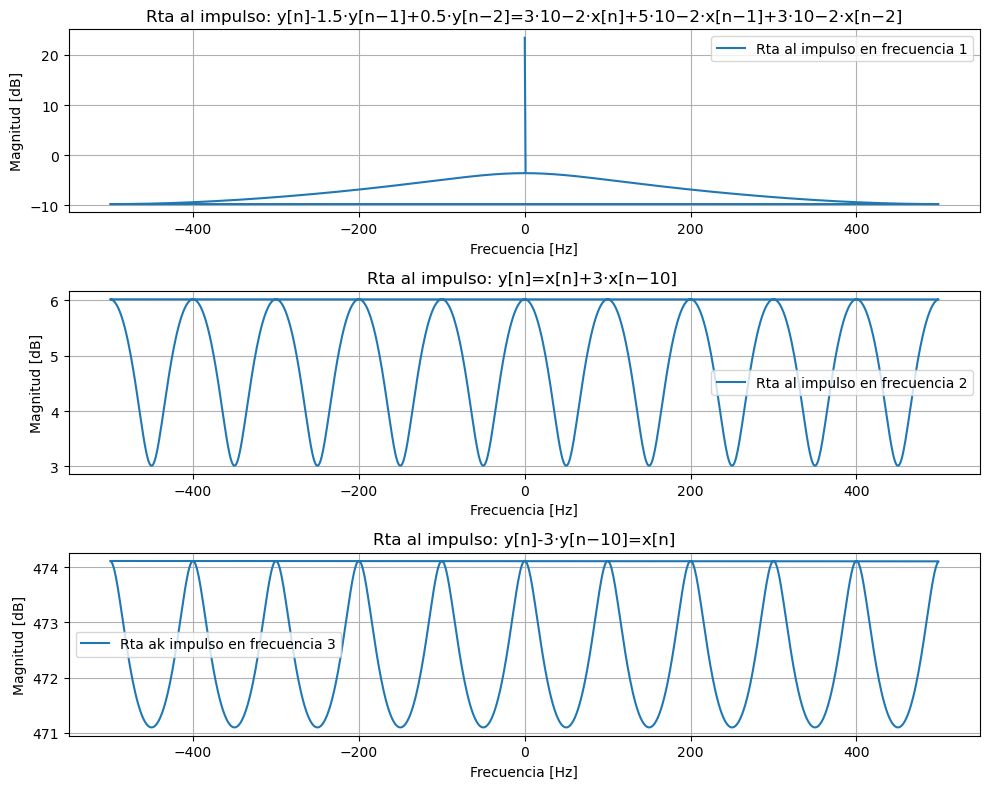

In [8]:
#Calculo de rta en frecuencia de los sistemas LTI
tiempo0, x0, var_x0 = mi_funcion_sen(A0 = 1, offset = 0, f0 = 50000 , phase = 0, nn = N, fs = fs)
freqsLTI = np.fft.fftfreq(N, Ts)
delta = np.zeros(len(x0))
delta[0] = 1

#sistema 1
a0 = np.array([1, -1.5, 0.5]) #coeficientes de y
b0 = np.array([0.03, 0.05, 0.03]) #coeficientes de x

h0 = signal.lfilter(b0, a0, delta)
fft_h0 = fft(h0)

#sistema 2
a1 = np.array([1]) #coeficientes de y
b1 = np.zeros(11) #coeficientes de x
b1[0] = 1
b1[10] = 3

h1 = signal.lfilter(b1, a1, delta)
fft_h1 = fft(h1)

#sistema 3
a2 = np.zeros(11) #coeficientes de y
a2[0] = 1
a2[10] = -3
b2 = np.array([1]) #coeficientes de x

h2 = signal.lfilter(b2, a2, delta)
fft_h2 = fft(h2)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(freqsLTI, np.log10(np.abs(fft_h0))*10,label = 'Rta al impulso en frecuencia 1')
plt.title('Rta al impulso: y[n]-1.5⋅y[n−1]+0.5⋅y[n−2]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(freqsLTI, np.log10(np.abs(fft_h1))*10,label = 'Rta al impulso en frecuencia 2')
plt.title('Rta al impulso: y[n]=x[n]+3⋅x[n−10] ')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.plot(freqsLTI, np.log10(np.abs(fft_h2))*10,label = 'Rta ak impulso en frecuencia 3')
plt.title('Rta al impulso: y[n]-3⋅y[n−10]=x[n]')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Sistema 0:** Tiene coeficientes sobre la salida y la entrada. Esto hace que ciertas frecuencias se refuercen y otras se atenúen, como un filtro.

**Sistema 1:** Solo suma la señal actual con la señal retrasada 10 muestras. Esto genera un eco periódico. En el gráfico de magnitud se ven picos espaciados regularmente; cada pico corresponde a la frecuencia donde el eco refuerza la señal.

**Sistema 2:** Tiene retroalimentación, es decir, cuando una parte de la salida de un sistema se vuelve a inyectar como entrada para influir en el comportamiento futuro del mismo. Esto hace que algunas frecuencias se resuenen mucho y otras se atenúen. En el gráfico, los picos son más pronunciados y delgados

# Conclusion

En este trabajo aprendí varios conceptos nuevos, como la estimación espectral, la PSD y el uso de la FFT para analizar señales en el dominio de la frecuencia. Implementé gráficos en dB para mejorar la visualización de los espectros y pude observar de manera clara fenómenos como el desparramo espectral y el efecto del zero padding sobre la resolución de la FFT.

También pusimos en práctica conceptos teóricos, como la identidad de Parseval, para verificar que la potencia de las señales se conserva entre los dominios de tiempo y frecuencia. Al analizar los sistemas LTI de la TS anterior, pude relacionar la respuesta en frecuencia de un sistema con su efecto sobre distintas componentes de frecuencia de la señal de entrada.

En resumen, este trabajo permitió consolidar conocimientos teóricos con experimentos prácticos, mostrando cómo las herramientas de análisis espectral nos ayudan a interpretar señales y sistemas de manera más realista y precisa.

## Autoevaluacion

*Indicar una opción (marcada con negrita):*

**1. Resolví la tarea con seguridad**
2. Resolví la tarea, pero tengo dudas
3. Resolví la tarea,pero no entendí bien
4. No pude resolverla y no entendí


Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea aprendí a usar la FFT y graficar en dB. Tambien vimos muchos conceptos nuevos como el desparramo, el analisis espectral, la respuesta en frecuencia entre otros. El trabajo me ayudo bastante a entender los temas pero necesito un poco mas de estudio para que me quede todo bien claro.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Fue mucha información, necesito bajar todo al papel como para aclarar las ideas. Pero creo que entendí casi todo.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones